In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Model K-Means Clustering

In [2]:
# Load data stock
adro = pd.read_csv("Stock/ADRO.JK.csv")
bumi = pd.read_csv("Stock/BUMI.JK.csv")
byan = pd.read_csv("Stock/BYAN.JK.csv")
gems = pd.read_csv("Stock/GEMS.JK.csv")
indy = pd.read_csv("Stock/INDY.JK.csv")
itmg = pd.read_csv("Stock/ITMG.JK.csv")
ptba = pd.read_csv("Stock/PTBA.JK.csv")

In [3]:
# Merge data
stocks = pd.concat([adro, bumi, byan, gems, indy, itmg, ptba], keys=["ADRO", "BUMI", "BYAN", "GEMS", "INDY", "ITMG", "PTBA"])
stocks.reset_index(level=0, inplace=True)
stocks.rename(columns={"level_0" : "Code"}, inplace=True)

In [4]:
# Solve Missing Values
stocks = stocks.dropna()

In [5]:
# Melihat nilai korelasi antar fitur dengan target
target = ['Open', 'High', 'Low', 'Close', 'Volume']
corr = stocks[target].corrwith(stocks['Adj Close']).sort_values(ascending=False)
corr

Low       0.791990
Close     0.791903
High      0.791711
Open      0.791690
Volume   -0.090854
dtype: float64

In [6]:
# Feature Selection
features = ['Open', 'High', 'Low', 'Close']
X = stocks[features]

In [7]:
# Normalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

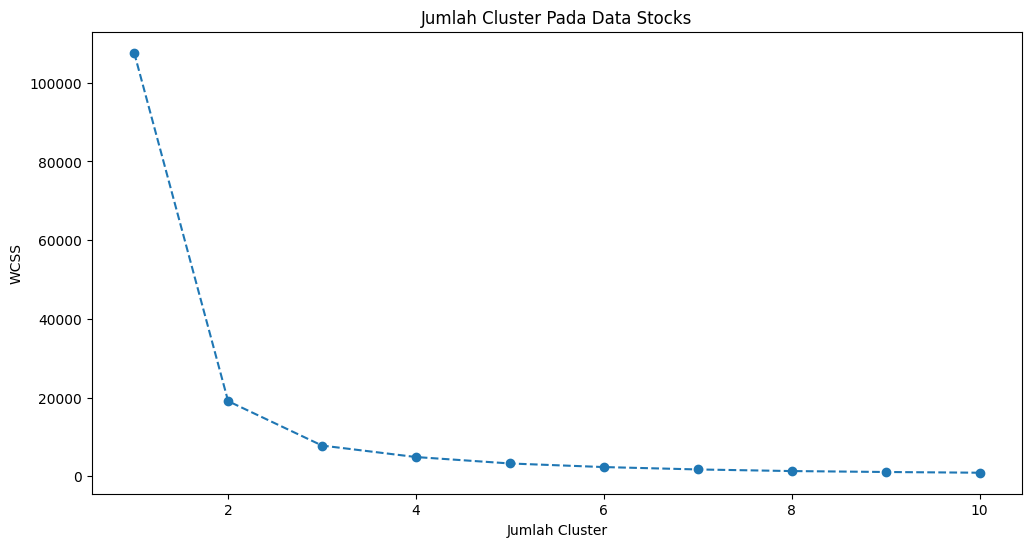

In [8]:
# Cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
# Visualisasi dengan Elbow
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Jumlah Cluster Pada Data Stocks")
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [9]:
# Bangun Model K-Means
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Tambah Cluster ke Data
stocks['Cluster'] = clusters
stocks

,Code,Date,Open,High,Low,Close,Adj Close,Volume,Cluster
0,ADRO,2008-08-01,1630.0,1680.0,1620.0,1630.0,625.735046,78478500.0,0
1,ADRO,2008-08-04,1590.0,1630.0,1590.0,1590.0,610.379700,43837000.0,0
2,ADRO,2008-08-05,1550.0,1580.0,1540.0,1550.0,595.024109,50244500.0,0
3,ADRO,2008-08-06,1540.0,1570.0,1540.0,1540.0,591.185242,48545500.0,0
4,ADRO,2008-08-07,1560.0,1570.0,1540.0,1560.0,598.863159,50999500.0,0
...,...,...,...,...,...,...,...,...,...
3959,PTBA,2024-08-28,2790.0,2800.0,2770.0,2780.0,2780.000000,10744200.0,0
3960,PTBA,2024-08-29,2780.0,2810.0,2760.0,2780.0,2780.000000,15032300.0,0
3961,PTBA,2024-08-30,2780.0,2780.0,2730.0,2730.0,2730.000000,21459200.0,0
3962,PTBA,2024-09-02,2740.0,2820.0,2730.0,2820.0,2820.000000,30665600.0,0


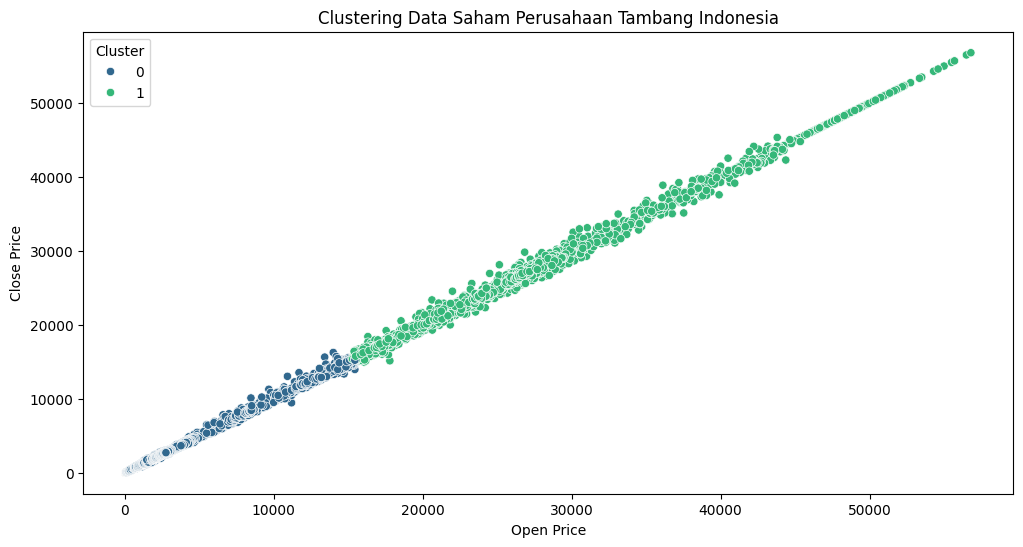

In [10]:
# Visualisasi hasil clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=stocks, x='Open', y='Close', hue='Cluster', palette='viridis')
plt.title("Clustering Data Saham Perusahaan Tambang Indonesia")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()

In [11]:
# Silhouette Score
silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score : {silhouette:.4f}")

# Davies-Boudlin Score
davies_boudlin = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Boudlin Score : {davies_boudlin:.4f}")

Silhouette Score : 0.8660
Davies-Boudlin Score : 0.3602


In [12]:
# Filter Kode Saham berdasarkan Cluster 0
cluster_0 = stocks[stocks['Cluster'] == 0]['Code'].unique()
print("Kode saham di cluster 0 : ")
print(cluster_0)

# Jumlah Saham di Cluster 0
count_cluster_0 = stocks[stocks['Cluster'] == 0]['Code'].nunique()
print(f"Jumlah Saham : {count_cluster_0}")

print("============================================")

# Filter Kode Saham berdasarkan Cluster 1
cluster_1 = stocks[stocks['Cluster'] == 1]['Code'].unique()
print("Kode saham di cluster 1 : ")
print(cluster_1)

# Jumlah saham di cluster 0
count_cluster_1 = stocks[stocks['Cluster'] == 1]['Code'].nunique()
print(f"Jumlah Saham : {count_cluster_1}")

Kode saham di cluster 0 : 
['ADRO' 'BUMI' 'BYAN' 'GEMS' 'INDY' 'ITMG' 'PTBA']
Jumlah Saham : 7
Kode saham di cluster 1 : 
['BYAN' 'GEMS' 'ITMG']
Jumlah Saham : 3


In [13]:
# Jumlah Data untuk Cluster 0
cluster_0_data_km = stocks[stocks['Cluster'] == 0]['Code']
cluster_0_data_km.info()

<class 'pandas.core.series.Series'>
Index: 23588 entries, 0 to 3964
Series name: Code
Non-Null Count  Dtype 
--------------  ----- 
23588 non-null  object
dtypes: object(1)
memory usage: 368.6+ KB


In [14]:
# Jumlah Data untuk Cluster 1
cluster_1_km = stocks[stocks['Cluster'] == 1]['Code']
cluster_1_km.info()

<class 'pandas.core.series.Series'>
Index: 3324 entries, 3540 to 3964
Series name: Code
Non-Null Count  Dtype 
--------------  ----- 
3324 non-null   object
dtypes: object(1)
memory usage: 51.9+ KB


In [15]:
# rata-rata setiap fitur dari model Kmeans
stocks_summary_kmeans = stocks.groupby('Cluster')[['Open', 'High', 'Low', 'Close', 'Volume']].mean()
stocks_summary_kmeans

,Open,High,Low,Close,Volume
Cluster,,,,,
0,2289.733297,2326.415254,2253.120209,2288.376675,8.896458e+07
1,28396.871239,28790.079723,27993.772563,28385.288809,1.768250e+06


# Model Hierarchical Clustering

In [16]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [17]:
# feature selection
features_hc = ['Open', 'High', 'Low', 'Close']
X = stocks[features_hc]

In [18]:
# Normalisasi Data
scaler_hc = StandardScaler()
X_scaled = scaler.fit_transform(X)

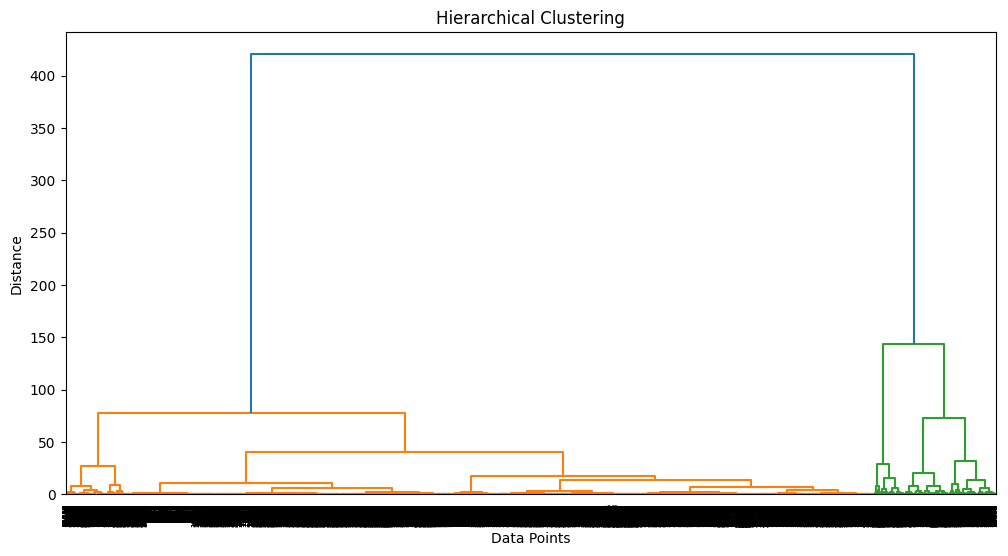

In [19]:
# Linkeage
linked = linkage(X_scaled, method="ward")

# Dendogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title("Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [20]:
# model hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clusters = hierarchical.fit_predict(X_scaled)

# tambah hasil cluster ke data
stocks['Cluster_hc'] = clusters
stocks

,Code,Date,Open,High,Low,Close,Adj Close,Volume,Cluster,Cluster_hc
0,ADRO,2008-08-01,1630.0,1680.0,1620.0,1630.0,625.735046,78478500.0,0,1
1,ADRO,2008-08-04,1590.0,1630.0,1590.0,1590.0,610.379700,43837000.0,0,1
2,ADRO,2008-08-05,1550.0,1580.0,1540.0,1550.0,595.024109,50244500.0,0,1
3,ADRO,2008-08-06,1540.0,1570.0,1540.0,1540.0,591.185242,48545500.0,0,1
4,ADRO,2008-08-07,1560.0,1570.0,1540.0,1560.0,598.863159,50999500.0,0,1
...,...,...,...,...,...,...,...,...,...,...
3959,PTBA,2024-08-28,2790.0,2800.0,2770.0,2780.0,2780.000000,10744200.0,0,1
3960,PTBA,2024-08-29,2780.0,2810.0,2760.0,2780.0,2780.000000,15032300.0,0,1
3961,PTBA,2024-08-30,2780.0,2780.0,2730.0,2730.0,2730.000000,21459200.0,0,1
3962,PTBA,2024-09-02,2740.0,2820.0,2730.0,2820.0,2820.000000,30665600.0,0,1


In [21]:
# evaluasi model
silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score : {silhouette:.4f}")

davis_bouldin = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Score : {davis_bouldin:.4f}")

Silhouette Score : 0.8657
Davies-Bouldin Score : 0.3697


In [22]:
# Kode dan saham cluster 0
cluster_0_hc = stocks[stocks['Cluster_hc'] == 0]['Code'].unique()
print("Kode saham cluster 0 : ", cluster_0_hc)
jumlah_cluster_0_hc = stocks[stocks['Cluster_hc'] == 0]['Code'].nunique()
print("Jumlah Saham : ", jumlah_cluster_0_hc)

# Kode dan saham cluster 1
cluster_1_hc = stocks[stocks['Cluster_hc'] == 1]['Code'].unique()
jumlah_cluster_1_hc = stocks[stocks['Cluster_hc'] == 1]['Code'].nunique()
print("Kode Saham Cluster 1 : ", cluster_1_hc)
print("Jumlah Saham : ", jumlah_cluster_1_hc)

Kode saham cluster 0 :  ['BYAN' 'GEMS' 'ITMG']
Jumlah Saham :  3
Kode Saham Cluster 1 :  ['ADRO' 'BUMI' 'BYAN' 'GEMS' 'INDY' 'ITMG' 'PTBA']
Jumlah Saham :  7


In [23]:
# Jumlah Data untuk Cluster 0
cluster_0_data = stocks[stocks['Cluster_hc'] == 0]['Code']
cluster_0_data.info()

<class 'pandas.core.series.Series'>
Index: 3501 entries, 3529 to 3964
Series name: Code
Non-Null Count  Dtype 
--------------  ----- 
3501 non-null   object
dtypes: object(1)
memory usage: 54.7+ KB


In [24]:
# Jumlah Data untuk Cluster 1
cluster_1_data = stocks[stocks['Cluster_hc'] == 1]['Code']
cluster_1_data.info()

<class 'pandas.core.series.Series'>
Index: 23411 entries, 0 to 3964
Series name: Code
Non-Null Count  Dtype 
--------------  ----- 
23411 non-null  object
dtypes: object(1)
memory usage: 365.8+ KB


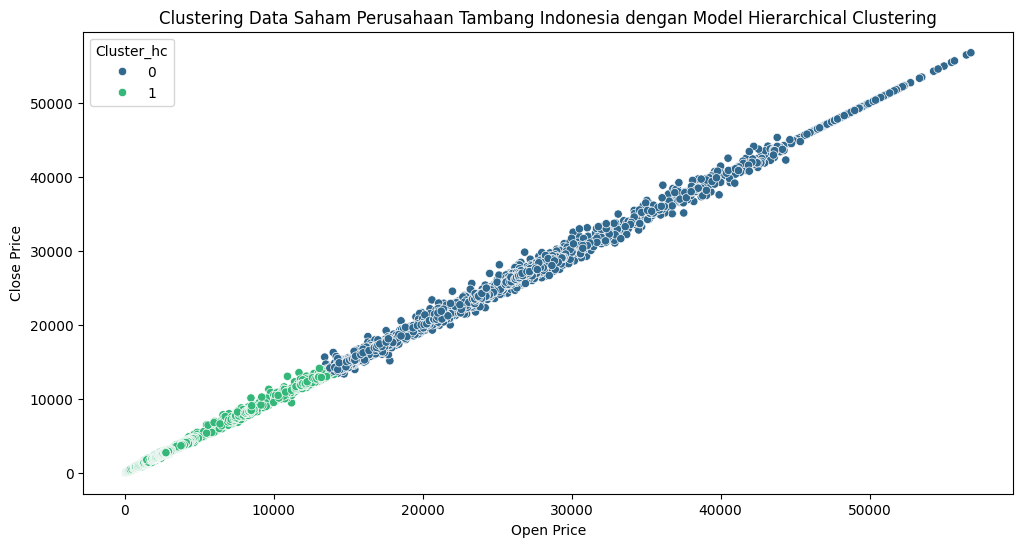

In [25]:
# Visualisasi hasil clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=stocks, x='Open', y='Close', hue='Cluster_hc', palette='viridis')
plt.title("Clustering Data Saham Perusahaan Tambang Indonesia dengan Model Hierarchical Clustering")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()

In [26]:
# rata-rata setiap fitur dari model HC
cluster_summary_hc = stocks.groupby('Cluster_hc')[['Open', 'High', 'Low', 'Close', 'Volume']].mean()
cluster_summary_hc

,Open,High,Low,Close,Volume
Cluster_hc,,,,,
0,27704.377321,28095.215653,27305.348472,27693.194801,1.840460e+06
1,2195.908077,2230.248943,2161.457200,2194.568963,8.961303e+07


# Optimasi Model K-Means dan Hierarchical Clustering

## Model K-Means

In [27]:
# Optimasi model K-Means
kmeans_opt = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=64)
clusters_opt = kmeans.fit_predict(X_scaled)

# Tambahkan ke data
stocks['Cluster_km_opt'] = clusters_opt
stocks

,Code,Date,Open,High,Low,Close,Adj Close,Volume,Cluster,Cluster_hc,Cluster_km_opt
0,ADRO,2008-08-01,1630.0,1680.0,1620.0,1630.0,625.735046,78478500.0,0,1,0
1,ADRO,2008-08-04,1590.0,1630.0,1590.0,1590.0,610.379700,43837000.0,0,1,0
2,ADRO,2008-08-05,1550.0,1580.0,1540.0,1550.0,595.024109,50244500.0,0,1,0
3,ADRO,2008-08-06,1540.0,1570.0,1540.0,1540.0,591.185242,48545500.0,0,1,0
4,ADRO,2008-08-07,1560.0,1570.0,1540.0,1560.0,598.863159,50999500.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3959,PTBA,2024-08-28,2790.0,2800.0,2770.0,2780.0,2780.000000,10744200.0,0,1,0
3960,PTBA,2024-08-29,2780.0,2810.0,2760.0,2780.0,2780.000000,15032300.0,0,1,0
3961,PTBA,2024-08-30,2780.0,2780.0,2730.0,2730.0,2730.000000,21459200.0,0,1,0
3962,PTBA,2024-09-02,2740.0,2820.0,2730.0,2820.0,2820.000000,30665600.0,0,1,0


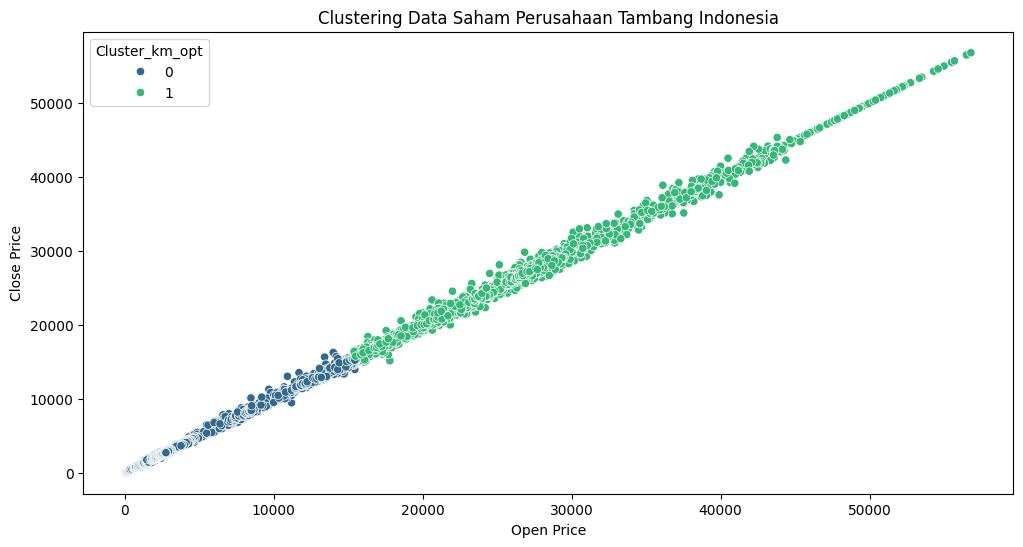

In [28]:
# Visualisasi hasil clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=stocks, x='Open', y='Close', hue='Cluster_km_opt', palette='viridis')
plt.title("Clustering Data Saham Perusahaan Tambang Indonesia")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()

In [29]:
# Filter Kode Saham berdasarkan Cluster 0
cluster_0 = stocks[stocks['Cluster_km_opt'] == 0]['Code'].unique()
print("Kode saham di cluster 0 : ")
print(cluster_0)

# Jumlah Saham di Cluster 0
count_cluster_0 = stocks[stocks['Cluster_km_opt'] == 0]['Code'].nunique()
print(f"Jumlah Saham : {count_cluster_0}")

print("============================================")

# Filter Kode Saham berdasarkan Cluster 1
cluster_1 = stocks[stocks['Cluster_km_opt'] == 1]['Code'].unique()
print("Kode saham di cluster 1 : ")
print(cluster_1)

# Jumlah saham di cluster 0
count_cluster_1 = stocks[stocks['Cluster_km_opt'] == 1]['Code'].nunique()
print(f"Jumlah Saham : {count_cluster_1}")

Kode saham di cluster 0 : 
['ADRO' 'BUMI' 'BYAN' 'GEMS' 'INDY' 'ITMG' 'PTBA']
Jumlah Saham : 7
Kode saham di cluster 1 : 
['BYAN' 'GEMS' 'ITMG']
Jumlah Saham : 3


In [30]:
# Filter data saham untuk Cluster 0
cluster_0_km_opt = stocks[stocks['Cluster_km_opt'] == 0]
cluster_0_km_opt

,Code,Date,Open,High,Low,Close,Adj Close,Volume,Cluster,Cluster_hc,Cluster_km_opt
0,ADRO,2008-08-01,1630.0,1680.0,1620.0,1630.0,625.735046,78478500.0,0,1,0
1,ADRO,2008-08-04,1590.0,1630.0,1590.0,1590.0,610.379700,43837000.0,0,1,0
2,ADRO,2008-08-05,1550.0,1580.0,1540.0,1550.0,595.024109,50244500.0,0,1,0
3,ADRO,2008-08-06,1540.0,1570.0,1540.0,1540.0,591.185242,48545500.0,0,1,0
4,ADRO,2008-08-07,1560.0,1570.0,1540.0,1560.0,598.863159,50999500.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3959,PTBA,2024-08-28,2790.0,2800.0,2770.0,2780.0,2780.000000,10744200.0,0,1,0
3960,PTBA,2024-08-29,2780.0,2810.0,2760.0,2780.0,2780.000000,15032300.0,0,1,0
3961,PTBA,2024-08-30,2780.0,2780.0,2730.0,2730.0,2730.000000,21459200.0,0,1,0
3962,PTBA,2024-09-02,2740.0,2820.0,2730.0,2820.0,2820.000000,30665600.0,0,1,0


In [31]:
# Filter data saham untuk Cluster 1
cluster_1_km_opt = stocks[stocks['Cluster_km_opt'] == 1]
cluster_1_km_opt

,Code,Date,Open,High,Low,Close,Adj Close,Volume,Cluster,Cluster_hc,Cluster_km_opt
3540,BYAN,2022-12-21,16325.0,18500.0,16300.0,18450.0,17778.367188,3483500.0,1,0,1
3541,BYAN,2022-12-22,18500.0,18650.0,17450.0,18050.0,17392.929688,2298000.0,1,0,1
3542,BYAN,2022-12-23,18000.0,18850.0,17650.0,18575.0,17898.816406,1991200.0,1,0,1
3543,BYAN,2022-12-26,18550.0,21700.0,18500.0,20575.0,19826.011719,2805600.0,1,0,1
3544,BYAN,2022-12-27,20625.0,24325.0,20625.0,23400.0,22548.171875,7500800.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3959,ITMG,2024-08-28,27000.0,27225.0,27000.0,27225.0,27225.000000,1236800.0,1,0,1
3960,ITMG,2024-08-29,27225.0,27750.0,27100.0,27175.0,27175.000000,2526100.0,1,0,1
3961,ITMG,2024-08-30,27175.0,27350.0,27075.0,27225.0,27225.000000,1453400.0,1,0,1
3962,ITMG,2024-09-02,27600.0,28125.0,27575.0,27675.0,27675.000000,4146500.0,1,0,1


## Model Hieararchical Clustering

In [32]:
linkage_methods = ['ward', 'complete', 'average', 'single']
for method in linkage_methods:
    hc = AgglomerativeClustering(n_clusters=2, linkage=method)
    labels = hc.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Method : {method}, Silhouette Score: {score}")

Method : ward, Silhouette Score: 0.8657080303350168
Method : complete, Silhouette Score: 0.8354464242281565
Method : average, Silhouette Score: 0.8657293272737456
Method : single, Silhouette Score: 0.805763877972227


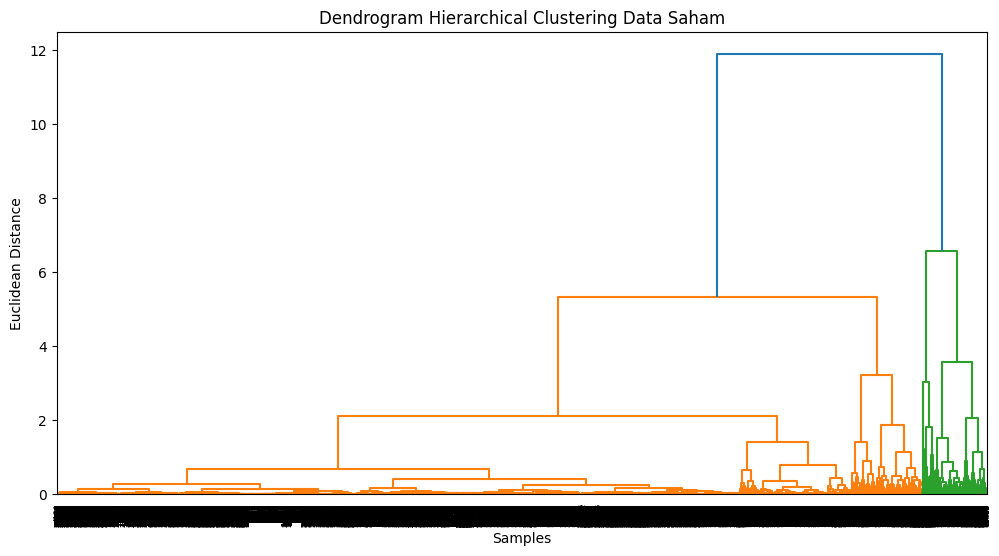

In [33]:
import scipy.cluster.hierarchy as sch

# Visualisasi 
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='complete'))
plt.title("Dendrogram Hierarchical Clustering Data Saham")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

In [34]:
hc = AgglomerativeClustering(n_clusters=2, metric='manhattan', linkage='complete')
labels = hc.fit_predict(X_scaled)

In [35]:
# tambah hasil cluster ke data
stocks['Cluster_hc_opt'] = clusters
stocks

,Code,Date,Open,High,Low,Close,Adj Close,Volume,Cluster,Cluster_hc,Cluster_km_opt,Cluster_hc_opt
0,ADRO,2008-08-01,1630.0,1680.0,1620.0,1630.0,625.735046,78478500.0,0,1,0,1
1,ADRO,2008-08-04,1590.0,1630.0,1590.0,1590.0,610.379700,43837000.0,0,1,0,1
2,ADRO,2008-08-05,1550.0,1580.0,1540.0,1550.0,595.024109,50244500.0,0,1,0,1
3,ADRO,2008-08-06,1540.0,1570.0,1540.0,1540.0,591.185242,48545500.0,0,1,0,1
4,ADRO,2008-08-07,1560.0,1570.0,1540.0,1560.0,598.863159,50999500.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3959,PTBA,2024-08-28,2790.0,2800.0,2770.0,2780.0,2780.000000,10744200.0,0,1,0,1
3960,PTBA,2024-08-29,2780.0,2810.0,2760.0,2780.0,2780.000000,15032300.0,0,1,0,1
3961,PTBA,2024-08-30,2780.0,2780.0,2730.0,2730.0,2730.000000,21459200.0,0,1,0,1
3962,PTBA,2024-09-02,2740.0,2820.0,2730.0,2820.0,2820.000000,30665600.0,0,1,0,1


In [36]:
# Jumlah Data untuk Cluster 0
cluster_0_hc_opt = stocks[stocks['Cluster_hc_opt'] == 0]['Code']
cluster_0_hc_opt.info()

<class 'pandas.core.series.Series'>
Index: 3501 entries, 3529 to 3964
Series name: Code
Non-Null Count  Dtype 
--------------  ----- 
3501 non-null   object
dtypes: object(1)
memory usage: 54.7+ KB


In [37]:
# Jumlah Data untuk Cluster 1
cluster_1_hc_opt = stocks[stocks['Cluster_hc_opt'] == 1]['Code']
cluster_1_hc_opt.info()

<class 'pandas.core.series.Series'>
Index: 23411 entries, 0 to 3964
Series name: Code
Non-Null Count  Dtype 
--------------  ----- 
23411 non-null  object
dtypes: object(1)
memory usage: 365.8+ KB


# Save Data

In [38]:
pip install openpyxl

In [39]:
# Pisah data berdasarkan cluster
cluster_0_sv = stocks[stocks['Cluster'] == 0].drop(columns=['Cluster_hc', 'Cluster_km_opt', 'Cluster_hc_opt'])
cluster_1_sv = stocks[stocks['Cluster'] == 1].drop(columns=['Cluster_hc', 'Cluster_km_opt', 'Cluster_hc_opt'])

# simpan dalam format excel
cluster_0_sv.to_excel('cluster_0.xlsx', index=False)
cluster_1_sv.to_excel('cluster_1.xlsx', index=False)

# Validasi
print("File Excel berhasil disimpan sebagai 'cluster_0.xlsx' dan 'cluster_1.xlsx")

File Excel berhasil disimpan sebagai 'cluster_0.xlsx' dan 'cluster_1.xlsx
